In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

In [39]:
def process_excel_files(filepath):
    df = pd.read_excel(filepath, skiprows=6, skipfooter=5, sheet_name=None)
    first_sheet_name = list(df.keys())[0]
    second_sheet_name = list(df.keys())[1]
    df_sheet1 = df[first_sheet_name]
    df_sheet2 = df[second_sheet_name]

    # Sheet 1 data
    station_name = df_sheet1.iloc[2, 1]
    basin_name = df_sheet1.iloc[9, 1]
    lat = df_sheet1.iloc[14, 1]
    lon = df_sheet1.iloc[15, 1]

    # Sheet 2 data
    final_df = df_sheet2
    final_df['station_name'] = station_name
    final_df['basin_name'] = basin_name
    final_df['latitude'] = lat
    final_df['longitude'] = lon
    drop_col = ['Data Type Code', 'Data Type Description', 'Unit']
    final_df = final_df.drop(drop_col, axis=1, errors='ignore')
    final_df['Data Time'] = final_df['Data Time'].str.split('.').str[0]
    final_df['Data Time'] = pd.to_datetime(final_df['Data Time'], format="%Y-%m-%dT%H:%M:%S", errors='coerce')
    final_df['year'] = final_df['Data Time'].dt.year
    final_df['date'] = final_df['Data Time'].dt.day
    final_df.rename(columns={'Data Time': 'timestamp', 'Data Value': 'level'}, inplace=True)
    return final_df, station_name

input_directory = './Dataset/Water Level'
output_directory = './Dataset/Discharge Output'
all_data = []

for sub_dir in os.listdir(input_directory):
    subDir_path = os.path.join(input_directory, sub_dir)
    for file in os.listdir(subDir_path):
        filepath = os.path.join(subDir_path, file)
        if file.endswith(('.xlsx', '.xls')): 
            try:
                discharge_data, station = process_excel_files(filepath)
                # print(f"Processed data shape: {discharge_data.shape if discharge_data is not None else 'No data'}")
                if discharge_data is not None and not discharge_data.empty:
                    all_data.append(discharge_data)
            except Exception as e:
                print(f"Error processing file {file}: {e}")
        else:
            print(f"Skipping non-Excel file: {file}")

    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        output_file = os.path.join(output_directory, f"{station}.csv")
        combined_df.to_csv(output_file, index=False)
        print(f"Combined data saved to {output_file}")
    else:
        print("No data to combine.")

Combined data saved to ./Dataset/Discharge Output\Vijayawada.csv


In [41]:
vijaya_df = pd.read_csv('Dataset/Discharge Output/Vijayawada.csv')
vijaya_df.head()

,timestamp,level,station_name,basin_name,latitude,longitude,year,date
0,2016-01-01 08:00:00,9.3,Vijayawada,Krishna,16.5011,80.625,2016,1
1,2016-01-01 13:00:00,9.3,Vijayawada,Krishna,16.5011,80.625,2016,1
2,2016-01-01 18:00:00,9.3,Vijayawada,Krishna,16.5011,80.625,2016,1
3,2016-01-02 08:00:00,9.3,Vijayawada,Krishna,16.5011,80.625,2016,2
4,2016-01-02 13:00:00,9.3,Vijayawada,Krishna,16.5011,80.625,2016,2


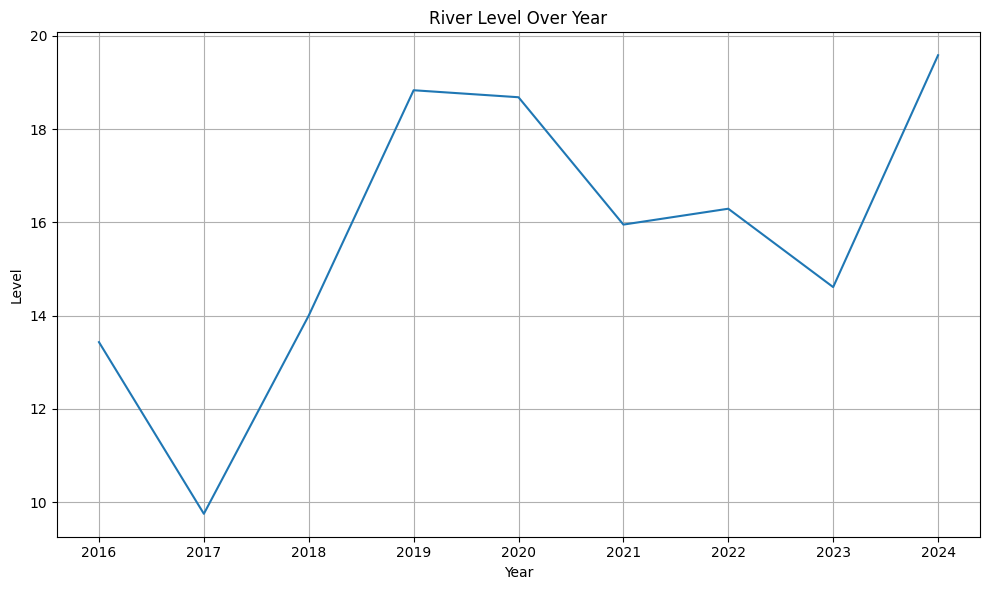

In [44]:
grouped_data = vijaya_df.groupby('year')['level'].max()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='line')
plt.title('River Level Over Year')
plt.xlabel('Year')
plt.ylabel('Level')
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
max_level_per_year = vijaya_df.loc[vijaya_df.groupby('year')['level'].idxmax()]
print(max_level_per_year[['year', 'timestamp', 'level']])

       year            timestamp      level
3232   2016  2016-09-24 17:00:00  13.432000
13187  2017  2017-07-20 06:00:00   9.752000
24824  2018  2018-08-21 07:00:00  14.002000
41557  2019  2019-08-16 23:00:00  18.832000
42546  2020  2020-10-17 04:00:00  18.681999
50025  2021  2021-08-06 17:00:00  15.952000
63157  2022  2022-10-17 04:00:00  16.292000
74532  2023  2023-07-28 17:00:00  14.612000
76772  2024  2024-09-02 11:00:00  19.582000


In [56]:
past_data = pd.read_csv('./Dataset/Vijayawada/krishna_floods.csv')
past_data.head()

FileNotFoundError: [Errno 2] No such file or directory: './Dataset/Vijayawada/krishna_floods.csv'

In [ ]:
vijaya_df['flood'] = False
vijaya_df['timestamp'] = pd.to_datetime(vijaya_df['timestamp'])
past_data['Start Date'] = pd.to_datetime(past_data['Start Date'], format='%d-%m-%Y %H:%M')
past_data['End Date'] = pd.to_datetime(past_data['End Date'], format='%d-%m-%Y %H:%M')

vijaya_df['Year'] = vijaya_df['timestamp'].dt.year
vijaya_df = vijaya_df.drop('year', axis=1)

for _, rows in past_data.iterrows():
    start_year = rows['Start Date'].year
    end_year = rows['End Date'].year
    vijaya_df.loc[(vijaya_df['Year'] >= start_year) & (vijaya_df['Year'] <= end_year), 'flood'] = True

vijaya_df.head()

,timestamp,discharge_value,station_name,basin_name,latitude,longitude,flood,Year
0,2016-06-01 08:00:00,0.0,Vijayawada,Krishna,16.5011,80.625,False,2016
1,2016-06-02 08:00:00,0.0,Vijayawada,Krishna,16.5011,80.625,False,2016
2,2016-06-03 08:00:00,0.0,Vijayawada,Krishna,16.5011,80.625,False,2016
3,2016-06-04 08:00:00,0.0,Vijayawada,Krishna,16.5011,80.625,False,2016
4,2016-06-05 08:00:00,0.0,Vijayawada,Krishna,16.5011,80.625,False,2016


In [35]:
vijaya_df[vijaya_df['flood'] == True].shape

(698, 8)

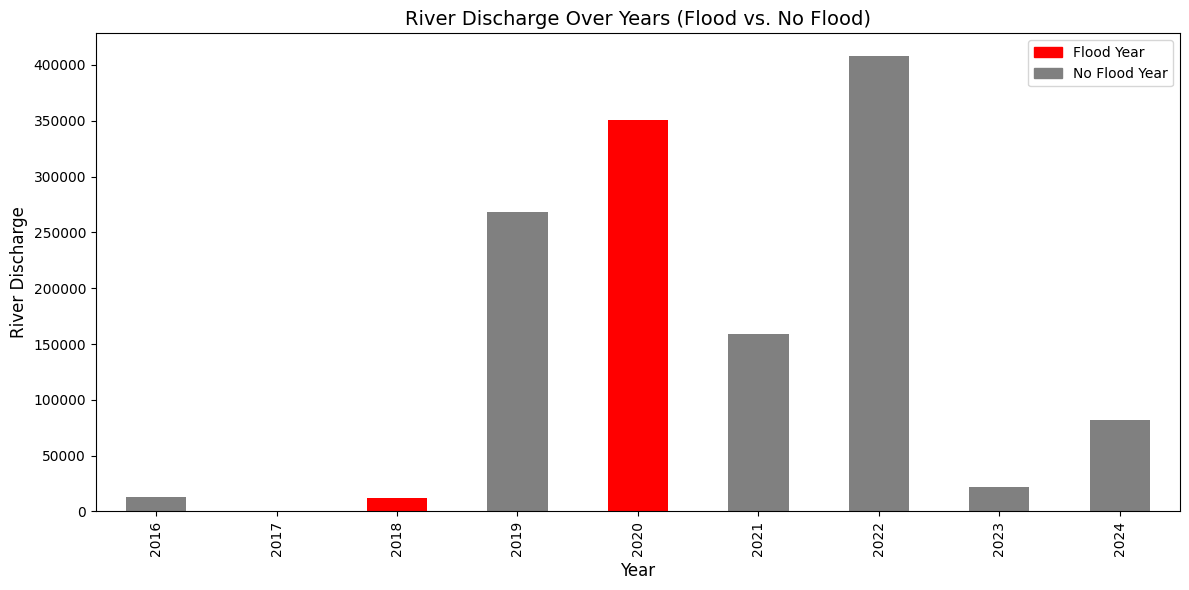

In [45]:
# Group the data by year and calculate the sum of discharge values
grouped_data = vijaya_df.groupby('Year')['discharge_value'].sum()

# Create a list of years that experienced floods
flood_years = past_data.apply(
    lambda row: pd.date_range(start=row['Start Date'], end=row['End Date']).year, axis=1
).explode().unique()

# Determine colors: red for flood years, grey for non-flood years
bar_colors = ['red' if year in flood_years else 'grey' for year in grouped_data.index]

# Plot the bar graph
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', color=bar_colors)

# Add titles and labels
plt.title('River Discharge Over Years (Flood vs. No Flood)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('River Discharge', fontsize=12)

# Enhance layout
plt.tight_layout()
red_patch = mpatches.Patch(color='red', label='Flood Year')
grey_patch = mpatches.Patch(color='grey', label='No Flood Year')
plt.legend(handles=[red_patch, grey_patch], loc="upper right")
plt.show()


In [15]:
level = pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\FINAL YEAR PROJECT\Vijayawada.xlsx", sheet_name='River Water Level - Vijayawada', skiprows=6, skipfooter=4)
level.head()

,Data Type Code,Data Type Description,Data Time,Data Value,Unit
0,HZS,MANUAL-Water Level by Staff Gauge (0),2024-11-08T13:00:00,0.740,m
1,HHS,MANUAL-WL by Staff Gauge (MSL),2024-09-19T15:00:00,10.702,m
2,HHS,MANUAL-WL by Staff Gauge (MSL),2024-08-18T04:00:00,10.922,m
3,HZS,MANUAL-Water Level by Staff Gauge (0),2024-09-24T14:00:00,2.320,m
4,HHS,MANUAL-WL by Staff Gauge (MSL),2024-09-01T00:00:00,15.602,m


In [3]:
level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747 entries, 0 to 4746
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data Type Code         4746 non-null   object 
 1   Data Type Description  4746 non-null   object 
 2   Data Time              4746 non-null   object 
 3   Data Value             4746 non-null   float64
 4   Unit                   4746 non-null   object 
dtypes: float64(1), object(4)
memory usage: 185.6+ KB


In [16]:
level['Data Time'] = pd.to_datetime(level['Data Time'])
level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747 entries, 0 to 4746
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Data Type Code         4746 non-null   object        
 1   Data Type Description  4746 non-null   object        
 2   Data Time              4746 non-null   datetime64[ns]
 3   Data Value             4746 non-null   float64       
 4   Unit                   4746 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 185.6+ KB


In [25]:
aug_data = level[level['Data Time'].dt.month == 8]
sep_data = level[level['Data Time'].dt.month == 9]
oct_data = level[level['Data Time'].dt.month == 10]

In [26]:
aug_data.loc[:, 'Day'] = aug_data['Data Time'].dt.day
sep_data.loc[:, 'Day'] = sep_data['Data Time'].dt.day
oct_data.loc[:, 'Day'] = oct_data['Data Time'].dt.day

C:\Users\HP\AppData\Local\Temp\ipykernel_14072\1331016466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aug_data.loc[:, 'Day'] = aug_data['Data Time'].dt.day
C:\Users\HP\AppData\Local\Temp\ipykernel_14072\1331016466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sep_data.loc[:, 'Day'] = sep_data['Data Time'].dt.day
C:\Users\HP\AppData\Local\Temp\ipykernel_14072\1331016466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [31]:
grouped_aug_data = aug_data.groupby('Day')['Data Value'].max()
grouped_sep_data = sep_data.groupby('Day')['Data Value'].max()
grouped_oct_data = oct_data.groupby('Day')['Data Value'].max()

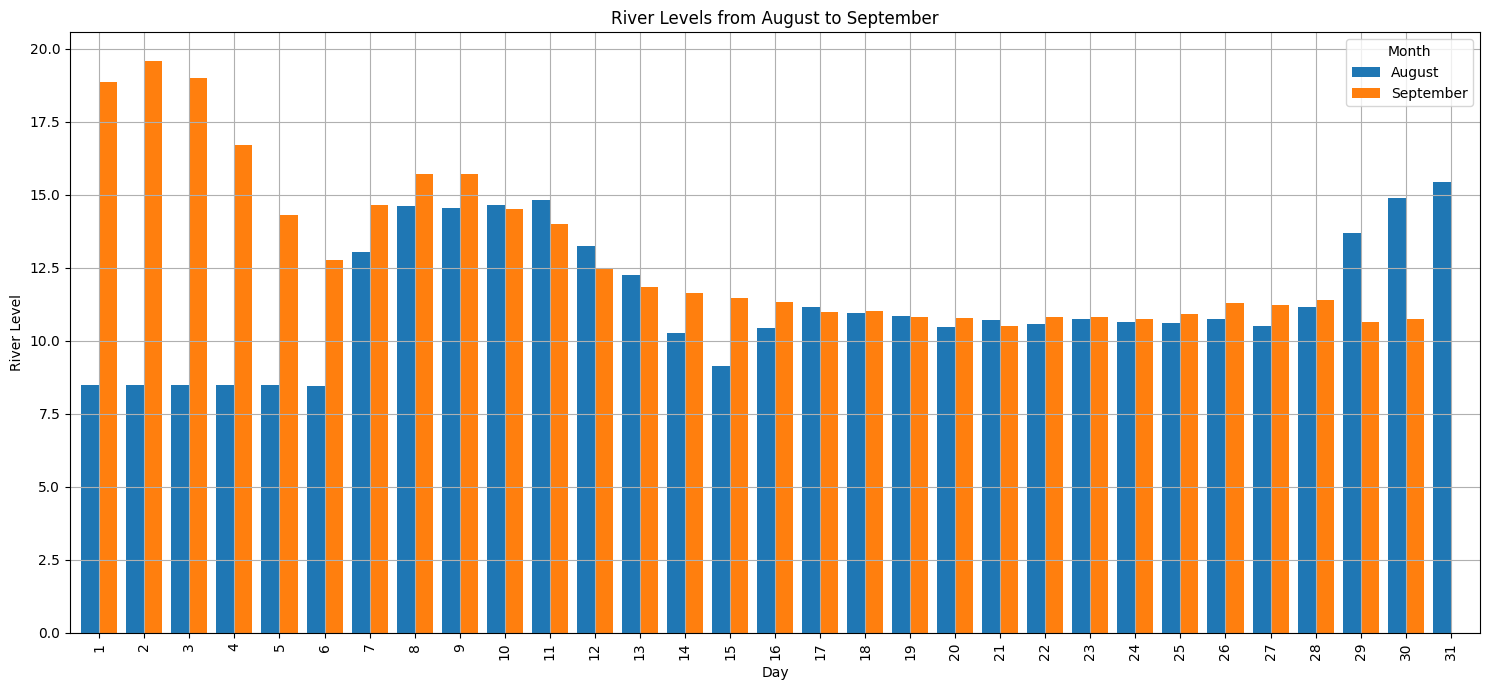

In [36]:
combined_data = pd.DataFrame({
    'August': grouped_aug_data,
    'September': grouped_sep_data,
})

combined_data.plot(kind='bar', figsize=(15, 7), width=0.8)
plt.title('River Levels from August to September')
plt.xlabel('Day')
plt.ylabel('River Level')
plt.legend(title="Month")
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
prakasam_df = pd.read_csv('./Dataset/Praksamm.csv')

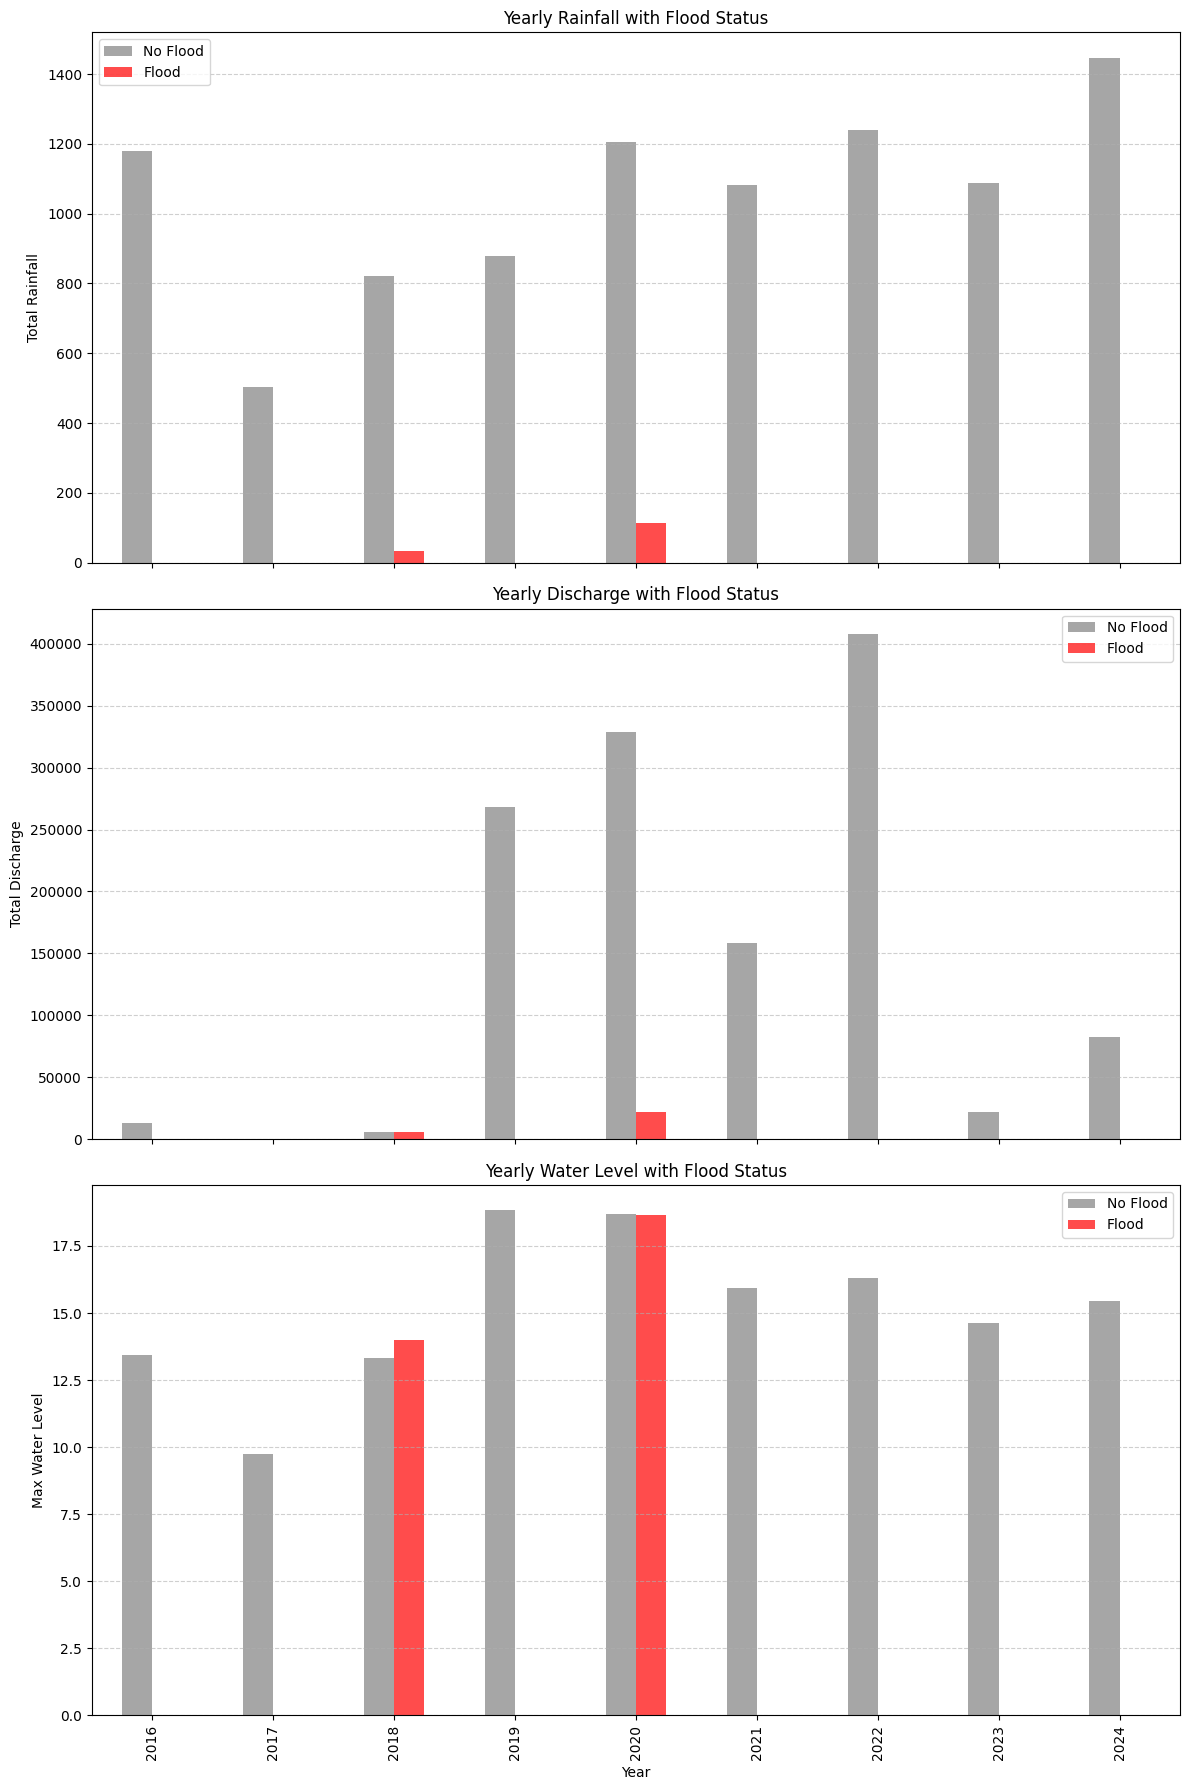

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset for Prakasam
prakasam_df = pd.read_csv('./Dataset/Praksamm.csv', parse_dates=['date'])

# Define columns for plotting
rainfall_column = 'precipitation'
discharge_column = 'discharge_value'
level_column = 'water_level'
flood_column = 'flood_occurred'

# Group data by year and flood status
grouped_data_rainfall = prakasam_df.groupby(['year', flood_column])[rainfall_column].sum().unstack()
grouped_data_discharge = prakasam_df.groupby(['year', flood_column])[discharge_column].sum().unstack()
grouped_data_level = prakasam_df.groupby(['year', flood_column])[level_column].max().unstack()

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# Rainfall subplot
grouped_data_rainfall.plot(kind='bar', ax=axs[0], color=['grey', 'red'], alpha=0.7)
axs[0].set_title('Yearly Rainfall with Flood Status')
axs[0].set_ylabel('Total Rainfall')
axs[0].grid(axis='y', linestyle='--', alpha=0.6)
axs[0].legend(['No Flood', 'Flood'])

# Discharge subplot
grouped_data_discharge.plot(kind='bar', ax=axs[1], color=['grey', 'red'], alpha=0.7)
axs[1].set_title('Yearly Discharge with Flood Status')
axs[1].set_ylabel('Total Discharge')
axs[1].grid(axis='y', linestyle='--', alpha=0.6)
axs[1].legend(['No Flood', 'Flood'])

# Water Level subplot
grouped_data_level.plot(kind='bar', ax=axs[2], color=['grey', 'red'], alpha=0.7)
axs[2].set_title('Yearly Water Level with Flood Status')
axs[2].set_ylabel('Max Water Level')
axs[2].grid(axis='y', linestyle='--', alpha=0.6)
axs[2].legend(['No Flood', 'Flood'])

# Layout adjustments
plt.xlabel('Year')
plt.tight_layout()
plt.show()